In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fileName= "E:\\Learning\\Machine learning\\Projects\\Titanic\\train.csv"
testFile = "E:\\Learning\\Machine learning\\Projects\\Titanic\\test.csv"
testDF = pd.read_csv(testFile)
df = pd.read_csv(fileName)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
cdf = df.copy()
cdf = cdf.drop(['Name' , 'Ticket' , "Fare" ,'Cabin' , 'Embarked'] , axis= 1)

In [8]:
cdf.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


In [9]:
cdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
dtype: int64

In [10]:
cdf = cdf.dropna()

In [11]:
cdf["FamilyMember"]=cdf["SibSp"]+cdf["Parch"]
cdf = cdf.drop(["SibSp" , "Parch"] ,axis=1)
cdf.head()

,PassengerId,Survived,Pclass,Sex,Age,FamilyMember
0,1,0,3,male,22.0,1
1,2,1,1,female,38.0,1
2,3,1,3,female,26.0,0
3,4,1,1,female,35.0,1
4,5,0,3,male,35.0,0


In [12]:
cdf["FamilyMember"].value_counts()

FamilyMember
0    404
1    139
2     93
3     27
5     22
6     12
4     11
7      6
Name: count, dtype: int64

In [13]:

encoder = LabelEncoder().fit(["male" , "female"])
cdf["Sex"] = encoder.transform(cdf["Sex"])

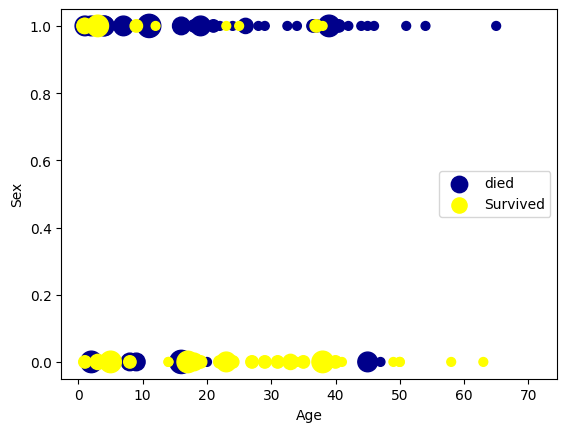

In [14]:
msk0=cdf[cdf["Survived"]==0]
msk1=cdf[cdf["Survived"]==1]
ax = msk0[0:100].plot(kind = "scatter" , x = "Age" , y = "Sex" , color = "darkblue" , s = msk0["FamilyMember"][0:100]*40 , label = "died");
msk1[0:100].plot(kind = "scatter" , x = "Age" , y = "Sex" , color = "yellow" , s = msk1["FamilyMember"][0:100]*40  , label = "Survived" , ax=ax)
plt.show()

In [15]:
cdf.groupby("Survived")["Sex"].value_counts()

Survived  Sex
0         1      360
          0       64
1         0      197
          1       93
Name: count, dtype: int64

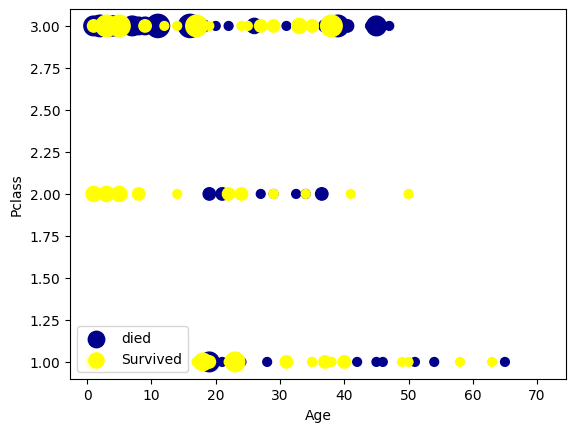

In [16]:
ax = msk0[0:100].plot(kind = "scatter" , x = "Age" , y = "Pclass" , color = "darkblue" , s = msk0["FamilyMember"][0:100]*40 , label = "died");
msk1[0:100].plot(kind = "scatter" , x = "Age" , y = "Pclass" , color = "yellow" , s = msk1["FamilyMember"][0:100]*40  , label = "Survived" , ax=ax)
plt.show()

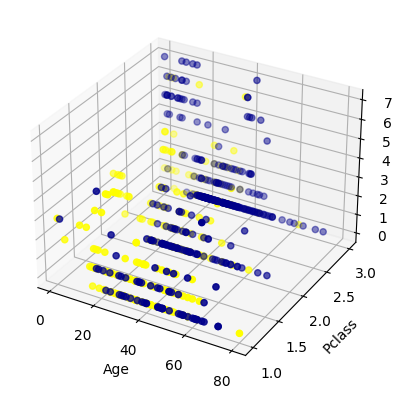

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111 , projection = "3d")
ax.scatter(msk0["Age"] , msk0["Pclass"] , msk0["FamilyMember"] , c ="darkblue")
ax.scatter(msk1["Age"] , msk1["Pclass"] , msk1["FamilyMember"] , c ="yellow")
ax.set_zlabel("FmailyMember")
ax.set_ylabel("Pclass")
ax.set_xlabel("Age")
plt.show()

In [18]:
X = cdf.drop(["Survived" , "PassengerId" ],axis =1)
y = np.asanyarray(cdf["Survived"])
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X[0:5]

array([[ 0.91123237,  0.75905134, -0.53037664,  0.03778282],
       [-1.47636364, -1.31743394,  0.57183099,  0.03778282],
       [ 0.91123237, -1.31743394, -0.25482473, -0.63664053],
       [-1.47636364, -1.31743394,  0.36516706,  0.03778282],
       [ 0.91123237,  0.75905134,  0.36516706, -0.63664053]])

In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X , y , test_size = 0.2 , random_state = 2)
print(f"train set{X_train.shape} , {y_train.shape}")
print(f"test set{X_test.shape} , {y_test.shape}")

train set(571, 4) , (571,)
test set(143, 4) , (143,)


# KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for k in range(1 , Ks):
    neigh = KNeighborsClassifier(n_neighbors = k)
    neigh.fit(X_train , y_train)
    y_hat = neigh.predict(X_test)
    mean_acc[k-1]= metrics.accuracy_score(y_test , y_hat)
    std_acc[k-1]= np.std((y_hat==y_test)/np.sqrt(y_hat.shape[0]))
mean_acc

array([0.74125874, 0.83916084, 0.81118881, 0.83916084, 0.82517483,
       0.83916084, 0.81818182, 0.82517483, 0.81818182])

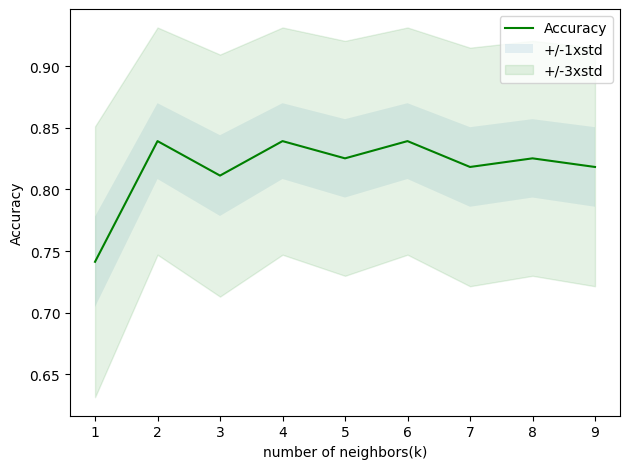

In [22]:
plt.plot(range(1 , Ks) , mean_acc , "g")
plt.fill_between(range(1 , Ks) , mean_acc-1*std_acc , mean_acc+1*std_acc , alpha= 0.1)
plt.fill_between(range(1 , Ks) , mean_acc-3*std_acc , mean_acc+3*std_acc , alpha= 0.1 , color = "green")
plt.legend(["Accuracy" , "+/-1xstd" , "+/-3xstd"])
plt.xlabel("number of neighbors(k)")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

In [23]:
print(f"best number of neighbord(k) is {mean_acc.argmax()+1} , with %.2f"% mean_acc.max(), "accuracy")

best number of neighbord(k) is 2 , with 0.84 accuracy


In [24]:
neigh = neigh = KNeighborsClassifier(n_neighbors = 2)
neigh.fit(X_train , y_train)    
Ky_hat = neigh.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm , classes  , normalize=False,title="Confusion matrix",cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without normalization")
    
    print(cm)
    plt.imshow(cm , interpolation = "nearest" ,cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks , classes , rotation = 45)
    plt.yticks(tick_marks , classes)
    fmt = ".2f" if normalize else "d"
    thresh = cm.max()/2
    for i , j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
        plt.text(j ,i , format(cm[i , j] , fmt) , horizontalalignment = "center" , color = "white" if cm[i , j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        93
           1       0.83      0.68      0.75        50

    accuracy                           0.84       143
   macro avg       0.84      0.80      0.81       143
weighted avg       0.84      0.84      0.83       143

0.5964912280701754
Confusion Matrix without normalization
[[81 12]
 [14 36]]


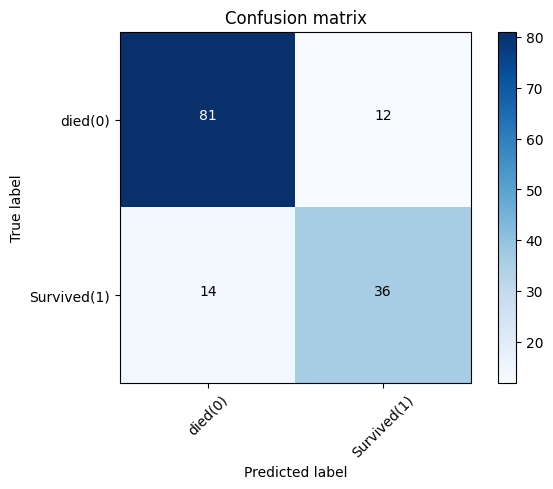

In [26]:
Kcnf_matrix = confusion_matrix(y_test , y_hat , labels = [0 ,1])
np.set_printoptions(precision= 2)
print(classification_report(y_test , Ky_hat))
print(metrics.jaccard_score(y_test , Ky_hat))
plot_confusion_matrix(Kcnf_matrix , classes=["died(0)" , "Survived(1)"])

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
score = {}
for solver in solvers:
    LR = LogisticRegression(C=0.01 , solver=solver)
    LR.fit(X_train , y_train)
    y_hat=LR.predict(X_test)
    f1_sc = metrics.f1_score(y_test , y_hat ,  average = "weighted")
    score[solver]=f1_sc
score

{'lbfgs': 0.8401848032597674,
 'liblinear': 0.8341205963847474,
 'newton-cg': 0.8401848032597674,
 'newton-cholesky': 0.8401848032597674,
 'sag': 0.8401848032597674,
 'saga': 0.8401848032597674}

In [29]:
max_score = max(score.values())
best_solver = max(score , key = score.get)
print(f"best solver is{best_solver} , with %.4f"  % max_score  , "score")

best solver islbfgs , with 0.8402 score


In [30]:
LR = LogisticRegression(C=0.01 , solver = best_solver )
LR.fit(X_train , y_train)
Ly_hat = LR.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        93
           1       0.75      0.80      0.78        50

    accuracy                           0.84       143
   macro avg       0.82      0.83      0.83       143
weighted avg       0.84      0.84      0.84       143

jaccard score :  0.6349206349206349
Confusion Matrix without normalization
[[80 13]
 [10 40]]


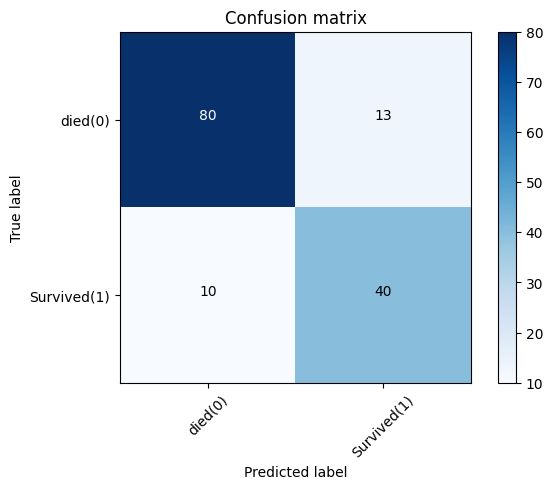

In [31]:
Lcnf_matrix = confusion_matrix(y_test , Ly_hat  , labels = [0 , 1])
np.set_printoptions(precision=2)
print(classification_report(y_test , Ly_hat))
print("jaccard score : " , metrics.jaccard_score(y_test , Ly_hat))
plot_confusion_matrix(Lcnf_matrix , classes=["died(0)" , "Survived(1)"])

# SVM

In [33]:
from sklearn import svm
kernels = ["rbf" , "linear" , "poly" , "sigmoid"]
score = {}
for kernel in kernels:
    clf = svm.SVC(kernel = kernel)
    clf.fit(X_train , y_train)
    y_hat = clf.predict(X_test)
    f1_sc = metrics.f1_score(y_test , y_hat , average = "weighted")
    score[kernel]=f1_sc
score
    

{'rbf': 0.8445681511470985,
 'linear': 0.8407688076196363,
 'poly': 0.8534769485264535,
 'sigmoid': 0.743845473127241}

In [34]:
max_score = max(score.values())
best_kernel = max(score , key = score.get)
print("best kernel is" , best_kernel , "with %.4f" % max_score , "accuracy")

best kernel is poly with 0.8535 accuracy


In [35]:
clf = svm.SVC(kernel = best_kernel)
clf.fit(X_train , y_train)
Sy_hat = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.88      0.89        93
           1       0.78      0.80      0.79        50

    accuracy                           0.85       143
   macro avg       0.84      0.84      0.84       143
weighted avg       0.85      0.85      0.85       143

jaccard score :  0.6557377049180327
Confusion Matrix without normalization
[[82 11]
 [10 40]]


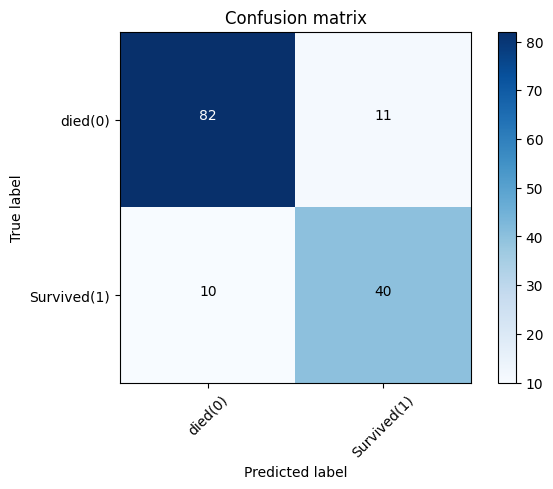

In [36]:
Scnf_matrix = confusion_matrix(y_test , Sy_hat , labels = [0 , 1])
np.set_printoptions(precision=2)
print(classification_report(y_test , Sy_hat))
print("jaccard score : " , metrics.jaccard_score(y_test , Sy_hat))
plot_confusion_matrix(Scnf_matrix , classes=["died(0)" , "Survived(1)"])

# Dicision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(criterion = "entropy" , max_depth = 4)
decisionTree.fit(X_train , y_train)
Dy_hat = decisionTree.predict(X_test)

In [39]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

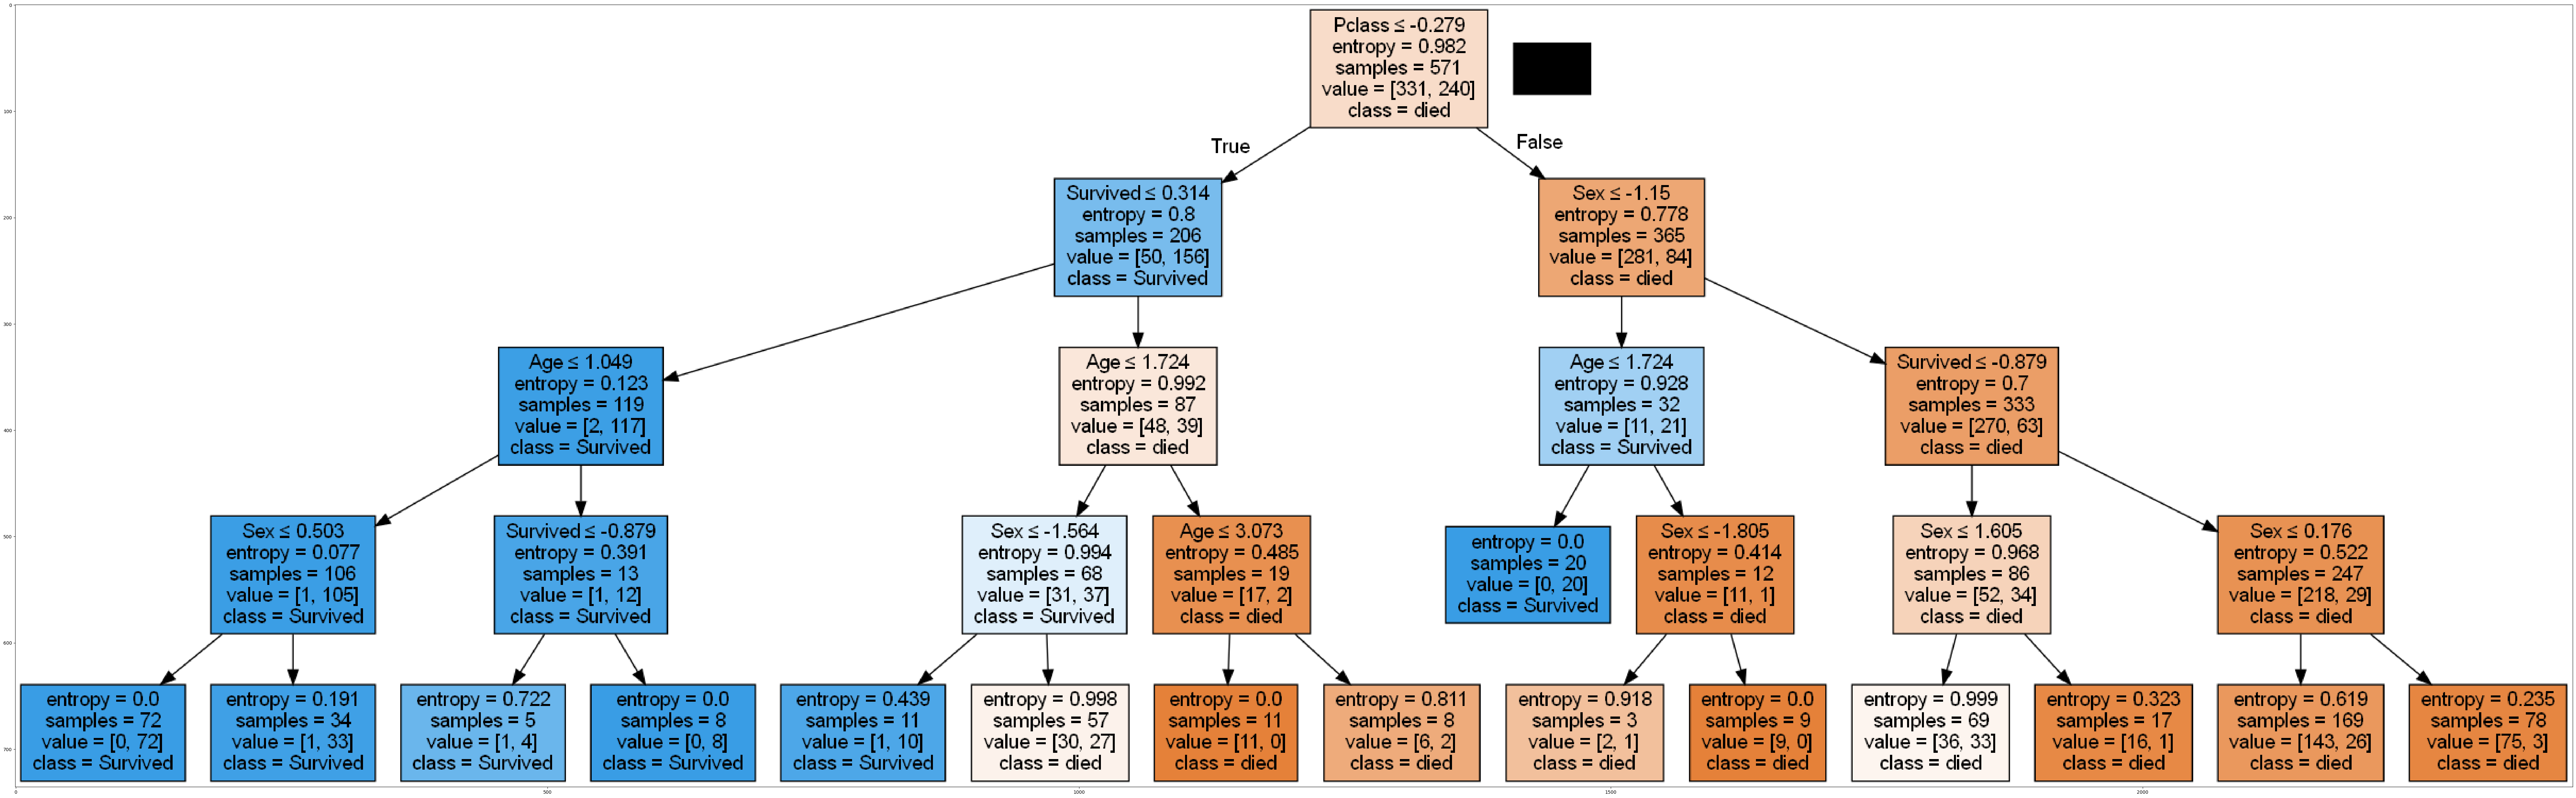

In [40]:
dot_data = StringIO()
filename = "titnicTree.png"
featuresname = cdf.columns[1:5]
out = tree.export_graphviz(decisionTree , feature_names = featuresname  , out_file = dot_data , class_names= ["died" , "Survived"] , filled=True ,special_characters=True,rotate=False )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize = (100 , 200))
plt.imshow(img , interpolation = "nearest")

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        93
           1       0.80      0.66      0.73        50

    accuracy                           0.83       143
   macro avg       0.82      0.79      0.80       143
weighted avg       0.82      0.83      0.82       143

jaccard score :  0.5689655172413793
Confusion Matrix without normalization
[[85  8]
 [17 33]]


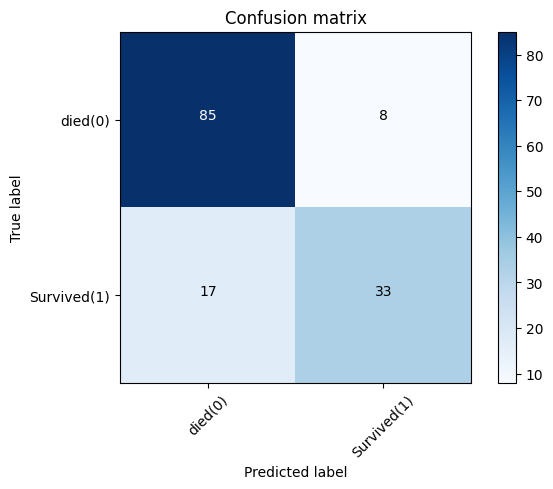

In [41]:
Dcnf_matrix = confusion_matrix(y_test , Dy_hat , labels = [0 , 1])
np.set_printoptions(precision=2)
print(classification_report(y_test , Dy_hat))
print("jaccard score : " , metrics.jaccard_score(y_test , Dy_hat))
plot_confusion_matrix(Dcnf_matrix , classes=["died(0)" , "Survived(1)"])

In [42]:
print("KNN")
print(classification_report(y_test , Ky_hat))
print("------------------------------\n------------------------------")
print("Logistic Regression")
print(classification_report(y_test , Ly_hat))
print("------------------------------\n------------------------------")
print("SVM")
print(classification_report(y_test , Sy_hat))
print("------------------------------\n------------------------------")
print("Decision Tree")
print(classification_report(y_test , Dy_hat))

KNN
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        93
           1       0.83      0.68      0.75        50

    accuracy                           0.84       143
   macro avg       0.84      0.80      0.81       143
weighted avg       0.84      0.84      0.83       143

------------------------------
------------------------------
Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        93
           1       0.75      0.80      0.78        50

    accuracy                           0.84       143
   macro avg       0.82      0.83      0.83       143
weighted avg       0.84      0.84      0.84       143

------------------------------
------------------------------
SVM
              precision    recall  f1-score   support

           0       0.89      0.88      0.89        93
           1       0.78      0.80      0.79        50

    accuracy                  

In [43]:
testDF.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [44]:
testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [45]:
testDF.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [46]:
testCDF = testDF.copy()

In [47]:
testCDF = testCDF.drop(['Name' , 'Ticket' , 'Fare', 'Cabin', 'Embarked'], axis = 1)
testCDF.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1


In [48]:
testCDF.shape

(418, 6)

In [49]:
testCDF.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
dtype: int64

In [50]:
testCDF["Age"] = testCDF["Age"].fillna(testCDF["Age"].median())
print(testCDF.isnull().sum())
print(testCDF.shape)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64
(418, 6)


In [51]:
testCDF["FamilyMember"] = testCDF['SibSp']+testCDF['Parch']
testCDF = testCDF.drop(['SibSp' ,'Parch'] , axis = 1)
testCDF.head()

,PassengerId,Pclass,Sex,Age,FamilyMember
0,892,3,male,34.5,0
1,893,3,female,47.0,1
2,894,2,male,62.0,0
3,895,3,male,27.0,0
4,896,3,female,22.0,2


In [52]:
testCDF["Sex"] = encoder.transform(testCDF["Sex"])
data = testCDF.drop("PassengerId" , axis = 1)
data = scaler.transform(data)
data[0:5]

array([[ 0.91,  0.76,  0.33, -0.64],
       [ 0.91, -1.32,  1.19,  0.04],
       [-0.28,  0.76,  2.23, -0.64],
       [ 0.91,  0.76, -0.19, -0.64],
       [ 0.91, -1.32, -0.53,  0.71]])

In [53]:
pred = clf.predict(data)
predDict = dict()
for id  , p in zip(testCDF["PassengerId"] , pred):
    predDict[id]=p
predDict

{892: 0,
 893: 0,
 894: 0,
 895: 0,
 896: 1,
 897: 0,
 898: 1,
 899: 0,
 900: 1,
 901: 0,
 902: 0,
 903: 0,
 904: 1,
 905: 0,
 906: 1,
 907: 1,
 908: 0,
 909: 0,
 910: 1,
 911: 0,
 912: 0,
 913: 0,
 914: 1,
 915: 1,
 916: 1,
 917: 0,
 918: 1,
 919: 0,
 920: 0,
 921: 0,
 922: 0,
 923: 0,
 924: 0,
 925: 0,
 926: 0,
 927: 0,
 928: 1,
 929: 1,
 930: 0,
 931: 0,
 932: 0,
 933: 0,
 934: 0,
 935: 1,
 936: 1,
 937: 0,
 938: 0,
 939: 0,
 940: 1,
 941: 0,
 942: 0,
 943: 0,
 944: 1,
 945: 1,
 946: 0,
 947: 0,
 948: 0,
 949: 0,
 950: 0,
 951: 1,
 952: 0,
 953: 0,
 954: 0,
 955: 1,
 956: 1,
 957: 1,
 958: 1,
 959: 0,
 960: 0,
 961: 1,
 962: 1,
 963: 0,
 964: 1,
 965: 0,
 966: 1,
 967: 0,
 968: 0,
 969: 1,
 970: 0,
 971: 1,
 972: 0,
 973: 0,
 974: 0,
 975: 0,
 976: 0,
 977: 0,
 978: 1,
 979: 1,
 980: 1,
 981: 1,
 982: 1,
 983: 0,
 984: 1,
 985: 0,
 986: 1,
 987: 0,
 988: 0,
 989: 0,
 990: 1,
 991: 0,
 992: 1,
 993: 0,
 994: 0,
 995: 0,
 996: 1,
 997: 0,
 998: 0,
 999: 0,
 1000: 0,
 1001: 0,
 1002: 0

In [54]:
predDataFrame = pd.DataFrame.from_dict(predDict , orient='index')
predDataFrame

,0
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0
1308,0


In [55]:
predDataFrame= predDataFrame.reset_index()
predDataFrame

,index,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [56]:
predDataFrame.columns = ["PassengerId" , "Survived"]

In [57]:
predDataFrame.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
